# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

Body Temperature Mean: 98.24923076923078
Bode Temperature standard deviation: 0.7303577789050377
Male Temperature Mean: 98.1046153846154
Female Temperatrue Mean: 98.39384615384613


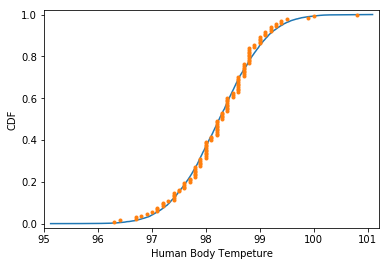

In [3]:
# Your work here.
import numpy as np
import matplotlib.pyplot as plt
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    return x,y

miu = np.mean(df.temperature)
sigma = np.std(df.temperature)
miu_m = np.mean(df[df.gender=='M'].temperature)
miu_f = np.mean(df[df.gender=='F'].temperature)
print('Body Temperature Mean:',miu)
print('Bode Temperature standard deviation:',sigma)
print('Male Temperature Mean:', miu_m)
print('Female Temperatrue Mean:', miu_f)
norm = np.random.normal(miu,sigma,10000)

norm_x, norm_y = ecdf(norm)
df_x, df_y = ecdf(df.temperature)

plt.plot(norm_x, norm_y)
plt.plot(df_x, df_y, marker = '.', linestyle='none')
plt.margins(0.02)

plt.xlabel('Human Body Tempeture')
plt.ylabel('CDF')
plt.show()


> Question 1: Is the distribution of body temperatures normal?

Answer: From the chart above, the human body temperature distribution seems to fit the normal distribution, but not perfectly. It could be due to the small size of the data set.


>Question 2: Is the sample size large? Are the observations independent?

Answer: The sample size is 130, not a very large one, but exceeds the minimum number(30) to apply the CLT. The observations are independent, because one person's body temperature would not affect another person's body temperature.

> Question 3:Is the true population mean really 98.6 degrees F?
            * Would you use a one-sample or two-sample test? Why?
            * In this situation, is it appropriate to use the  t  or  z  statistic?
            * Now try using the other test. How is the result be different? Why?
            
Answer:  To test the hypothesis H0: population mean = 98.6 degrees F, I would use a one-sample test, because there is only one group of data, no other group to campare with.

And the T test is appropriate to be used here. The reason is because to use a Z test, the population standard deviation must be available. And in the case of thie data set, only the polulation mean, sample mean and sample standard deviation is provided, but not the population standard deviation.

Below is the code and result of the T test.

In [4]:
t_score = (miu - 98.6)/(sigma/np.sqrt(130))
t_score

-5.4759252020781162

The t score acception region at 1% significance level is (-2.626,2.626), which the t score computed has ecceeded, thus the Null 
hypothesis: the true mean of body temperature = 98.6 degrees F is rejected at the 1% significance level.

Without the population std, a Z test can not be conducted, if we assume the sample std is the population std, the Z test would be equal to the T test.

In [5]:
tem_percentile = np.percentile(df.temperature,[5,95])
tem_percentile

array([ 97.045,  99.3  ])

> Question 4: At what temperature should we consider someone's temperature to be "abnormal"?

Answer: At the 90% confidence interval, if a person's body temperature is below 97.045 degrees F or above 99.3 degrees F, it should be considered abnormal. 

In [7]:
sigma_m = np.std(df[df.gender=='M'].temperature)
sigma_f = np.std(df[df.gender=='F'].temperature)
z_value = (miu_m - miu_f)/np.sqrt((sigma_m**2/len(df[df.gender=='M']))+(sigma_f**2/len(df[df.gender=='M'])))
z_value

-2.3032202891940123

> Question 5: Is there a significant difference between males and females in normal temperature?
          * What test did you use and why?
          * Write a story with your conclusion in the context of the original problem.
          
Answer:   The two sample Z test is used here, because the male and female body temperatures are two unrelated, independant groups.

The probability for z value -2.30 is 0.107, because the test is two tailed, hence the probability is doubled, and the conlusion is :At the significance level of 2.1%, the hypothesis (female human temperature mean = male human temperature mean) can not be reject. But it can be rejected at a 5% significance level.  